# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exercise-3.1.-First-order-condition-for-optimality" data-toc-modified-id="Exercise-3.1.-First-order-condition-for-optimality-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 3.1. First-order condition for optimality</a></div><div class="lev1 toc-item"><a href="#Exercise-3.2.--Stationary-points-of-a-simple-quadratic-function" data-toc-modified-id="Exercise-3.2.--Stationary-points-of-a-simple-quadratic-function-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 3.2.  Stationary points of a simple quadratic function</a></div><div class="lev1 toc-item"><a href="#Exercise-3.3.-Stationary-points-of-the-Rayleigh-quotient" data-toc-modified-id="Exercise-3.3.-Stationary-points-of-the-Rayleigh-quotient-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 3.3. Stationary points of the Rayleigh quotient</a></div><div class="lev1 toc-item"><a href="#Exercise-3.4.-First-order-coordinate-descent-as-a-local-optimization-scheme" data-toc-modified-id="Exercise-3.4.-First-order-coordinate-descent-as-a-local-optimization-scheme-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 3.4. First-order coordinate descent as a local optimization scheme</a></div><div class="lev1 toc-item"><a href="#Exercise-3.5.--Try-out-gradient-descent" data-toc-modified-id="Exercise-3.5.--Try-out-gradient-descent-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 3.5.  Try out gradient descent</a></div><div class="lev1 toc-item"><a href="#Exercise-3.6.-Compare-fixed-and-diminishing-steplengths-for-a-simple-example" data-toc-modified-id="Exercise-3.6.-Compare-fixed-and-diminishing-steplengths-for-a-simple-example-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 3.6. Compare fixed and diminishing steplengths for a simple example</a></div><div class="lev1 toc-item"><a href="#Exercise-3.7.-Oscillation-in-the-cost-function-history-plot" data-toc-modified-id="Exercise-3.7.-Oscillation-in-the-cost-function-history-plot-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise 3.7. Oscillation in the cost function history plot</a></div><div class="lev1 toc-item"><a href="#Exercise-3.8.-Tune-fixed-steplength-for-gradient-descent" data-toc-modified-id="Exercise-3.8.-Tune-fixed-steplength-for-gradient-descent-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exercise 3.8. Tune fixed steplength for gradient descent</a></div><div class="lev1 toc-item"><a href="#Exercise-3.9.-Code-up-momentum-accelerated-gradient-descent" data-toc-modified-id="Exercise-3.9.-Code-up-momentum-accelerated-gradient-descent-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exercise 3.9. Code up momentum-accelerated gradient descent</a></div><div class="lev1 toc-item"><a href="#Exercise-3.10.-Slow-crawling-behavior-of-gradient-descent" data-toc-modified-id="Exercise-3.10.-Slow-crawling-behavior-of-gradient-descent-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Exercise 3.10. Slow-crawling behavior of gradient descent</a></div><div class="lev1 toc-item"><a href="#Exercise-3.11.-Comparing-normalized-gradient-descent-schemes" data-toc-modified-id="Exercise-3.11.-Comparing-normalized-gradient-descent-schemes-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Exercise 3.11. Comparing normalized gradient descent schemes</a></div><div class="lev1 toc-item"><a href="#Exercise-3.12.-Alternative-formal-definition-of-Lipschitz-gradient" data-toc-modified-id="Exercise-3.12.-Alternative-formal-definition-of-Lipschitz-gradient-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Exercise 3.12. Alternative formal definition of Lipschitz gradient</a></div><div class="lev1 toc-item"><a href="#Exercise-3.13.-A-composition-of-functions-with-Lipschitz-gradient" data-toc-modified-id="Exercise-3.13.-A-composition-of-functions-with-Lipschitz-gradient-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Exercise 3.13. A composition of functions with Lipschitz gradient</a></div><div class="lev1 toc-item"><a href="#Extra:-Mini-batch-gradient-descent" data-toc-modified-id="Extra:-Mini-batch-gradient-descent-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Extra: Mini-batch gradient descent</a></div><div class="lev1 toc-item"><a href="#Extra:-Mini-batch-optimization-using-zero-order-method" data-toc-modified-id="Extra:-Mini-batch-optimization-using-zero-order-method-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Extra: Mini-batch optimization using zero order method</a></div>

In [2]:
# import basic libraries and autograd wrapped numpy
import sys
sys.path.append('../')
import autograd.numpy as np
import copy

# imports from custom library
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import calculus_library as calib
from mlrefined_libraries import math_optimization_library as optlib

# import custom plotting tools
static_plotter = optlib.static_plotter.Visualizer();
anime_plotter = optlib.animation_plotter.Visualizer();

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# Exercise 3.1. First-order condition for optimality

**a)** Setting the derivative of $g\left(w\right)$ to zero gives $g'\left(w\right)=\mbox{log}\left(w\right)-\mbox{log}\left(1-w\right)=0$.
Using the property of log, that $\mbox{log}\left(a\right)-\mbox{log}\left(b\right)=\mbox{log}\left(\frac{a}{b}\right)$
this can be written equivalently as $\mbox{log}\left(\frac{w}{1-w}\right)=0$,
and exponentiating each side this is equivalently $\frac{w}{1-w}=e^{0}=1$.
Rearranging this is $w=1-w$, or equivalently $w=\frac{1}{2}$. 

**b)** The first order system $\frac{\partial}{\partial w}g(w) = \frac{e^w}{1 + e^w} = 0$.  This fraction is zero only when $w = -\infty$

**c)**  The first order system is $\frac{\partial}{\partial w}g(w) = \text{tanh}(w) + w(1 - \text{tanh}^2(w)) = 0$.  The only point satisfying this equality is $w=0$ (this can be seen by e.g., plotting the function itself).

**d)** Setting up the first order system we have $\mathbf{B}\mathbf{w} = -\mathbf{c}$, and solving this system gives $\mathbf{w} = \begin{bmatrix} -0.4 \\ -0.2 \end{bmatrix}$

# Exercise 3.2.  Stationary points of a simple quadratic function

With this matrix notice how the quadratic term can be simplified considerably

\begin{equation}
\mathbf{w}^T \mathbf{C} \mathbf{w} = \mathbf{w}^T \frac{1}{\beta} \mathbf{I} \mathbf{w} = \frac{1}{\beta}\mathbf{w}^T \mathbf{w} = \frac{1}{\beta} \Vert \mathbf{w} \Vert^2_2
\end{equation}

$\,$

The gradient of \(g\) is then given as

\begin{equation}
\nabla g(\mathbf{w}) = \frac{2}{\beta} \mathbf{w} + \mathbf{b}
\end{equation}

$\,$

and setting this equal to zero we can solve explicitly for the single stationary point - which is a global minimum - of this function

\begin{equation}
\mathbf{w} = -\frac{\beta}{2}\mathbf{b}
\end{equation}

# Exercise 3.3. Stationary points of the Rayleigh quotient


Computing, the gradient of this function is given by

\begin{equation}
\nabla g(\mathbf{w}) = \frac{2}{\mathbf{w}^T \mathbf{w}}\left(\mathbf{C}\mathbf{w} - \frac{\mathbf{w}^T\mathbf{C}\mathbf{w}}{\mathbf{w}^T \mathbf{w}}\mathbf{w}\right)
\end{equation}

$\,$

Denote by \(\mathbf{v}\) and \(\lambda\) any eigenvector/eigenvalue pair of \(\mathbf{C}\). Then plugging in \(\mathbf{v}\) into the gradient we have, since by definition \(\mathbf{C}\mathbf{v} = \lambda \mathbf{v}\), that

\begin{equation}
\nabla g(\mathbf{v}) = \frac{2}{\mathbf{v}^T\mathbf{v}}\left(\lambda\mathbf{v}  - \lambda\frac{ \mathbf{v}^T\mathbf{v}}{\mathbf{v}^T\mathbf{v}}\mathbf{v}\right) =\frac{2}{\mathbf{v}^T\mathbf{v}}\left(\lambda\mathbf{v} - \lambda \mathbf{v}\right) = 0
\end{equation}

$\,$

In other words, the eigenvectors of \(\mathbf{C}\) are stationary points of the Raleigh Quotient.  By plugging the stationary point/eigenvector \(\mathbf{v}\) into the original function we can see that it takes the value \(\lambda\) given by the corresponding eigenvalue

\begin{equation}
g(\mathbf{v}) = \frac{\mathbf{v}^T\mathbf{C}\mathbf{v}}{\mathbf{v}^T \mathbf{v}} = \lambda\frac{\mathbf{v}^T\ \mathbf{v}}{\mathbf{v}^T \mathbf{v}} = \lambda
\end{equation}

$\,$

In particular this shows that the maximum value taken by the Raleigh Quotient is given by the maximum eigenvalue of \(\mathbf{C}\), and likewise at its minimum the function takes on the value of the minimum eigenvalue of \(\mathbf{C}\).


# Exercise 3.4. First-order coordinate descent as a local optimization scheme

**a)** Notice that this is indeed a local optimization method we have detailed here.  We did not write out the sequence of updates above in the familiar local optimization format of

\begin{equation}
\mathbf{w}^k = \mathbf{w}^{k-1} + \alpha \mathbf{d}^{k}
\end{equation}

because each update is more naturally written as the solution to a partial derivative equation.  However we could very well express the updates like this.  In particular on the $k^{th}$ sweep we can express the $n^{th}$ update above equivalently as

\begin{equation}
\mathbf{w}^{k+n} = \mathbf{w}^{k+n-1} + \alpha \mathbf{e}_n
\end{equation}

where $\mathbf{e}_n$ is the $n^{th}$ standard basis element and $\alpha = \left(w_n^{\star} - w_n^{k+n-1}\right)$ where $w_n^{\star}$ is the solution to equation (6).  So - in other words - this is a coordinate descent method akin to the zero-order method discussed in Section 5.5 only here we have used calculus (and the first order optimality condition in particular) to automatically tune the steplength $\alpha$ at each step.

**b)** In this example we develop the coordinate descent for minimizing a convex quadratic function

\begin{equation}
g\left(\mathbf{w}\right)=a + \mathbf{b}^{T}\mathbf{w} + \mathbf{w}^{T}\mathbf{C}\mathbf{w}
\end{equation}

In practice we almost never care about finding the minimum of a function that dips down to negative infinity, so in keeping with this we will assume that the quadratic is convex (this means that the matrix $\mathbf{C}$ is both symmetric and has all nonnegative eigenvalues.

In Section 6.1 we saw that the first order system for a general quadratic is given as

\begin{equation}
\nabla g(\mathbf{w}) = 2\mathbf{C}\mathbf{w} + \mathbf{b} = \mathbf{0}_{N\times 1}
\end{equation}

or if we write out the system equation-wise

\begin{equation}
\begin{array}
\
\frac{\partial}{\partial w_{1}}g(\mathbf{w})= 2\left(c_{11}w_1 + c_{12}w_2 + c_{13}w_3 +  \cdots + c_{1N}w_N\right) + b_1 = 0\\
\frac{\partial}{\partial w_{2}}g(\mathbf{w})=2\left(c_{21}w_1 + c_{22}w_2 + c_{23}w_3 + \cdots + c_{2N}w_N\right) + b_2 = 0\\
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\vdots \\
\frac{\partial}{\partial w_{N}}g(\mathbf{w})=2\left(c_{N1}w_1 + c_{N2}w_2 + c_{N3}w_3 +  \cdots + c_{NN}w_N\right) + b_N = 0.
\end{array}
\end{equation}

Solving the $n^{th}$ equation for $w_n$ gives

\begin{equation}
w_n = -\frac{c_{n1}^{\,}w_1 + c_{n2}^{\,}w_2 + \cdots + c_{nN}^{\,}w_N + \frac{1}{2}b_n^{\,}}{c_{nn} }
\end{equation}

In the next Python cell we implement this update scheme in Python in the function ``coordinate_descent_for_quadratic``.  This Python function takes in the constants of a quadratic ($a$, $\mathbf{b}$, and $\mathbf{C}$) and outputs a weight history at each individual weight update.  This is done so that we can visualize the resulting cost function decrease in a variety of ways.  In practice one need not record the weights at each weight update but e.g., the weights after each sweep through the coordinates, or the weight corresponding to the lowest cost function value attained thus far.

In [2]:
def coordinate_descent_for_quadratic(g,w,max_its,a,b,C):
    '''
    Coordinate descent wrapper for general quadratic function. Here
    
    a - a constant
    b - an Nx1 vector
    C - an NxN matrix (symmetric and all nonnegative eigenvalues)
    '''
        
    # record weights and cost history 
    weight_history = [copy.deepcopy(w)]     
    cost_history = [g(w)]
    N = np.size(w)
    
    # outer loop - each is a sweep through every variable once
    for k in range(max_its):
        # inner loop - each is a single variable update
        for n in range(N):
            w[n] = -(np.dot(C[n,:],w) - C[n,n]*w[n] + 0.5*b[n])/float(C[n,n])
            
            # record weights and cost value at each step
            weight_history.append(copy.deepcopy(w))
            cost_history.append(g(w))

    return weight_history,cost_history

First we use this algorithm to minimize the simple quadratic 

\begin{equation}
g(w_0,w_1) = w_0^2 + w_1^2 + 2
\end{equation}

which can be written in vector-matrix where $a = 2$, $\mathbf{b} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$, and $\mathbf{C} = \begin{bmatrix} 1 \,\, 0 \\ 0 \,\, 1 \end{bmatrix}$.  We initialize at $\mathbf{w} = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$ and run $1$ iteration of the algorithm - that is all it takes to perfectly minimize the function.

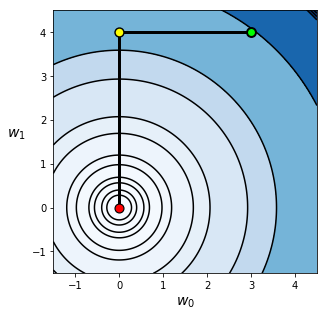

In [3]:
# This code cell will not be shown in the HTML version of this notebook
# define constants for a N=2 input quadratic
a = 2
b = np.zeros((2,1))
C = np.eye(2)

# a quadratic function defined using the constants above
g = lambda w: (a + np.dot(b.T,w) + np.dot(np.dot(w.T,C),w))[0]

# initialization
w = np.array([3,4])

# run your alternating descent code
max_its = 1
weight_history,cost_history = coordinate_descent_for_quadratic(g,w,max_its,a,b,C)

# show run in both three-dimensions and just the input space via the contour plot
static_plotter.two_input_contour_plot(g,weight_history,xmin = -1.5,xmax = 4.5,ymin = -1.5,ymax = 4.5,num_contours = 27,show_original = False)

Next we make a run of $2$ iterations of the method at the same initial point to completely minimize another convex quadratic with $a = 20$, $\mathbf{b} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$, and $\mathbf{C} = \begin{bmatrix} 2 \,\, 1 \\ 1 \,\, 2 \end{bmatrix}$. 

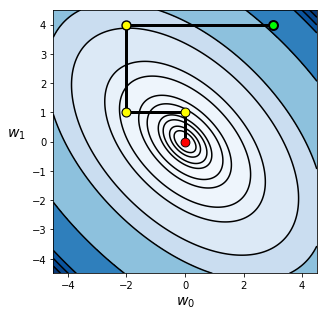

In [4]:
# This code cell will not be shown in the HTML version of this notebook
# define constants for a N=2 input quadratic
a = 20
b = np.zeros((2,1))
C = np.array([[2,1],[1,2]])

# a quadratic function defined using the constants above
g = lambda w: (a + np.dot(b.T,w) + np.dot(np.dot(w.T,C),w))[0]

# initialization
w = np.array([3,4])

# run your alternating descent code
max_its = 2
weight_history,cost_history = coordinate_descent_for_quadratic(g,w,max_its,a,b,C)

# show run in both three-dimensions and just the input space via the contour plot
static_plotter.two_input_contour_plot(g,weight_history,xmin = -4.5,xmax = 4.5,ymin = -4.5,ymax = 4.5,num_contours = 27,show_original = False)

# Exercise 3.5.  Try out gradient descent

The gradient descent implementation, using the hand-computed derivative.

$\frac{\partial}{\partial w}g(w) = \frac{1}{50}\left(4w^3 + 2w + 10 \right)$

In [7]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(alpha,max_its,w):
    # cost for this example
    g = lambda w: 1/50*(w**4 + w**2 + 10*w)
    
    # the gradient function for this example
    grad = lambda w: 1/50*(4*w**3 + 2*w + 10)

    # run the gradient descent loop
    cost_history = [g(w)]        # container for corresponding cost function history
    for k in range(1,max_its+1):       
        # evaluate the gradient, store current weights and cost function value
        grad_eval = grad(w)

        # take gradient descent step
        w = w - alpha*grad_eval
            
        # collect final weights
        cost_history.append(g(w))  
    return cost_history

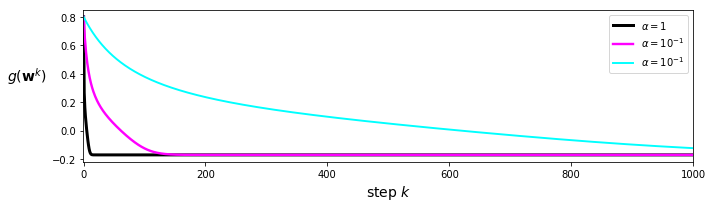

In [8]:
# initial point
w = 2.0
max_its = 1000

# first run
alpha = 10**(0)
cost_history_1 = gradient_descent(alpha,max_its,w)

alpha = 10**(-1)
cost_history_2 = gradient_descent(alpha,max_its,w)

alpha = 10**(-2)
cost_history_3 = gradient_descent(alpha,max_its,w)

# plot the cost function history for a given run
static_plotter.plot_cost_histories([cost_history_1,cost_history_2,cost_history_3],start = 0,points = False,labels = [r'$\alpha = 1$',r'$\alpha = 10^{-1}$',r'$\alpha = 10^{-2}$'])

# Exercise 3.6. Compare fixed and diminishing steplengths for a simple example

Below we illustrate the comparison of a fixed steplength scheme and a the diminishing steplength rule to minimize the function

\begin{equation}
g(w) = \left \vert w \right \vert.
\end{equation}

Notice that this function has a single global minimum at $w = 0$ and a derivative defined (everywhere but at $w = 0$)

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}g(w) = \begin{cases}
+1 \,\,\,\,\,\text{if} \,\, w > 0 \\
-1 \,\,\,\,\,\text{if} \,\, w < 0.
\end{cases}
\end{equation}

which makes the use of any fixed steplength scheme problematic for gradient descent.  Below we make two runs of $20$ steps of gradient descent each initialized at the point $w^0 = 2$, the first with a fixed steplength rule of $\alpha = 0.5$ (left panel) for each and every step, and the second using the diminishing steplength rule $\alpha = \frac{1}{k}$ (right panel).

In [ ]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

<IPython.core.display.Javascript object>


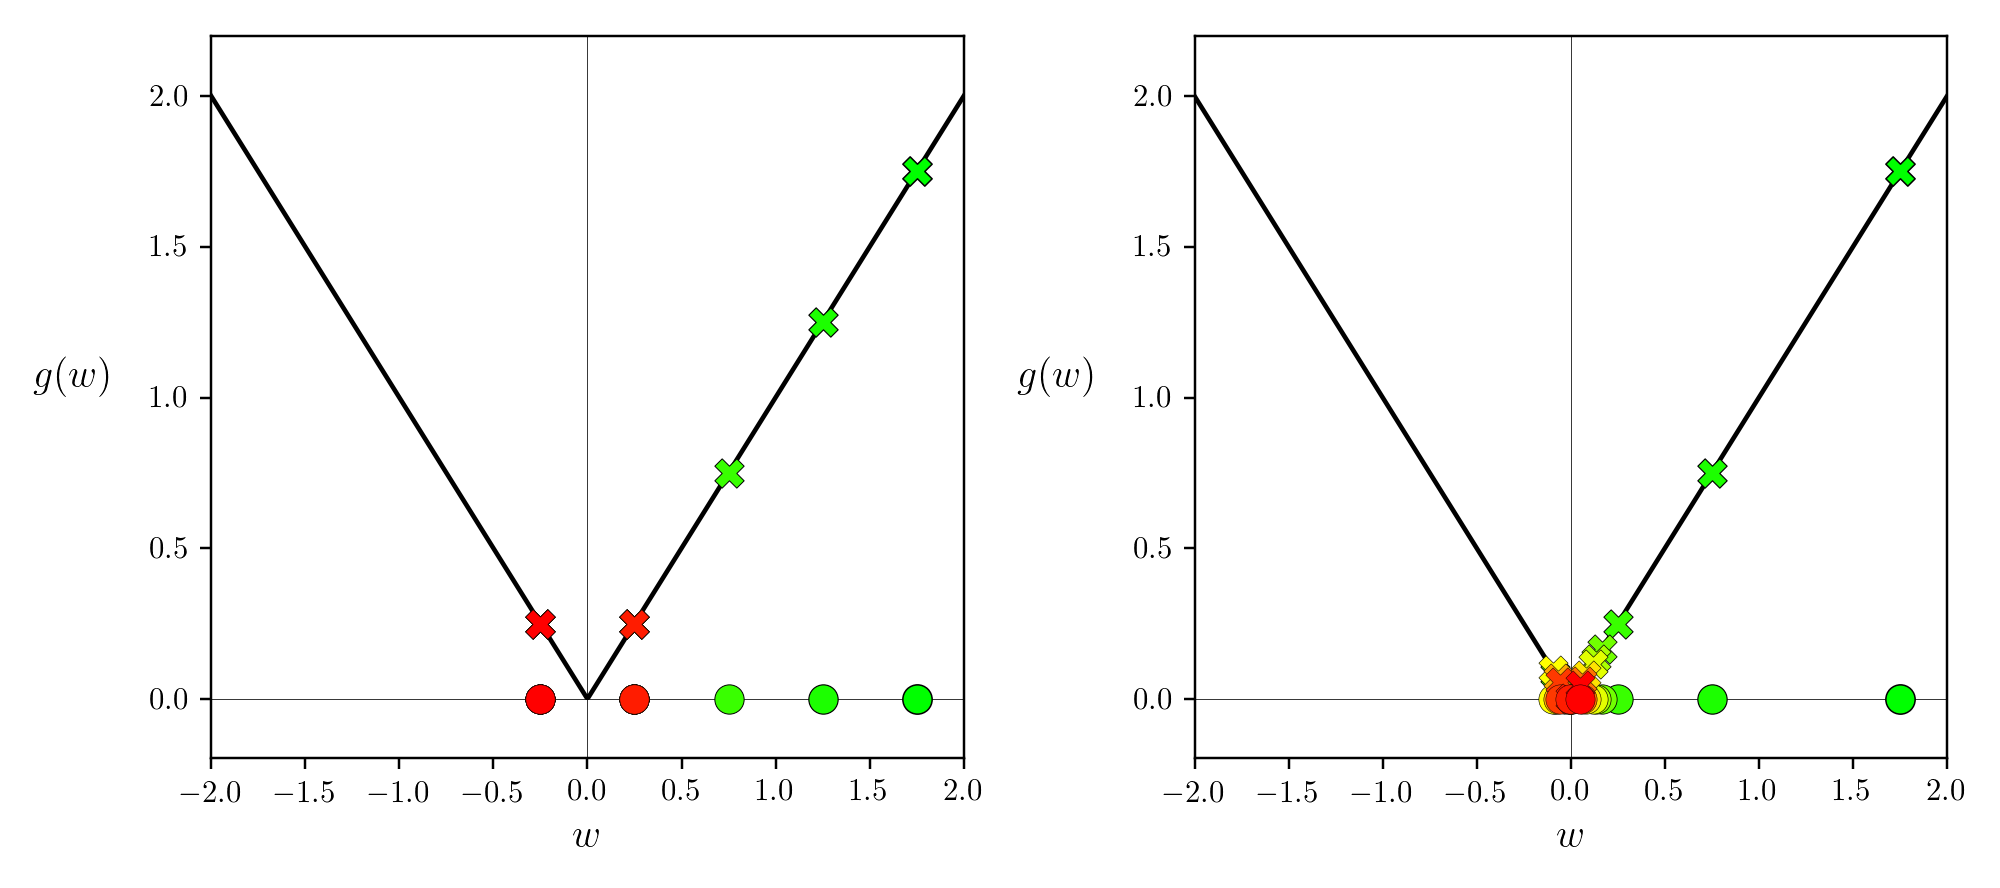

In [22]:
# This code cell will not be shown in the HTML version of this notebook
# what function should we play with?  Defined in the next line.
g = lambda w: np.abs(w)

# run gradient descent
alpha_choice = 0.5; w = 1.75; max_its = 20;
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)

alpha_choice = 'diminishing'; w = 1.75; max_its = 20;
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w)

# make static plot showcasing each step of this run
static_plotter.single_input_plot(g,[weight_history_1,weight_history_2],[cost_history_1,cost_history_2],wmin = -2,wmax = 2,onerun_perplot = True)

We can see that indeed here a diminishing steplength is absolutely necessary in order to reach a point close to the minimum of this function.  We can see this even more clearly via the cost function history plot below.

<IPython.core.display.Javascript object>


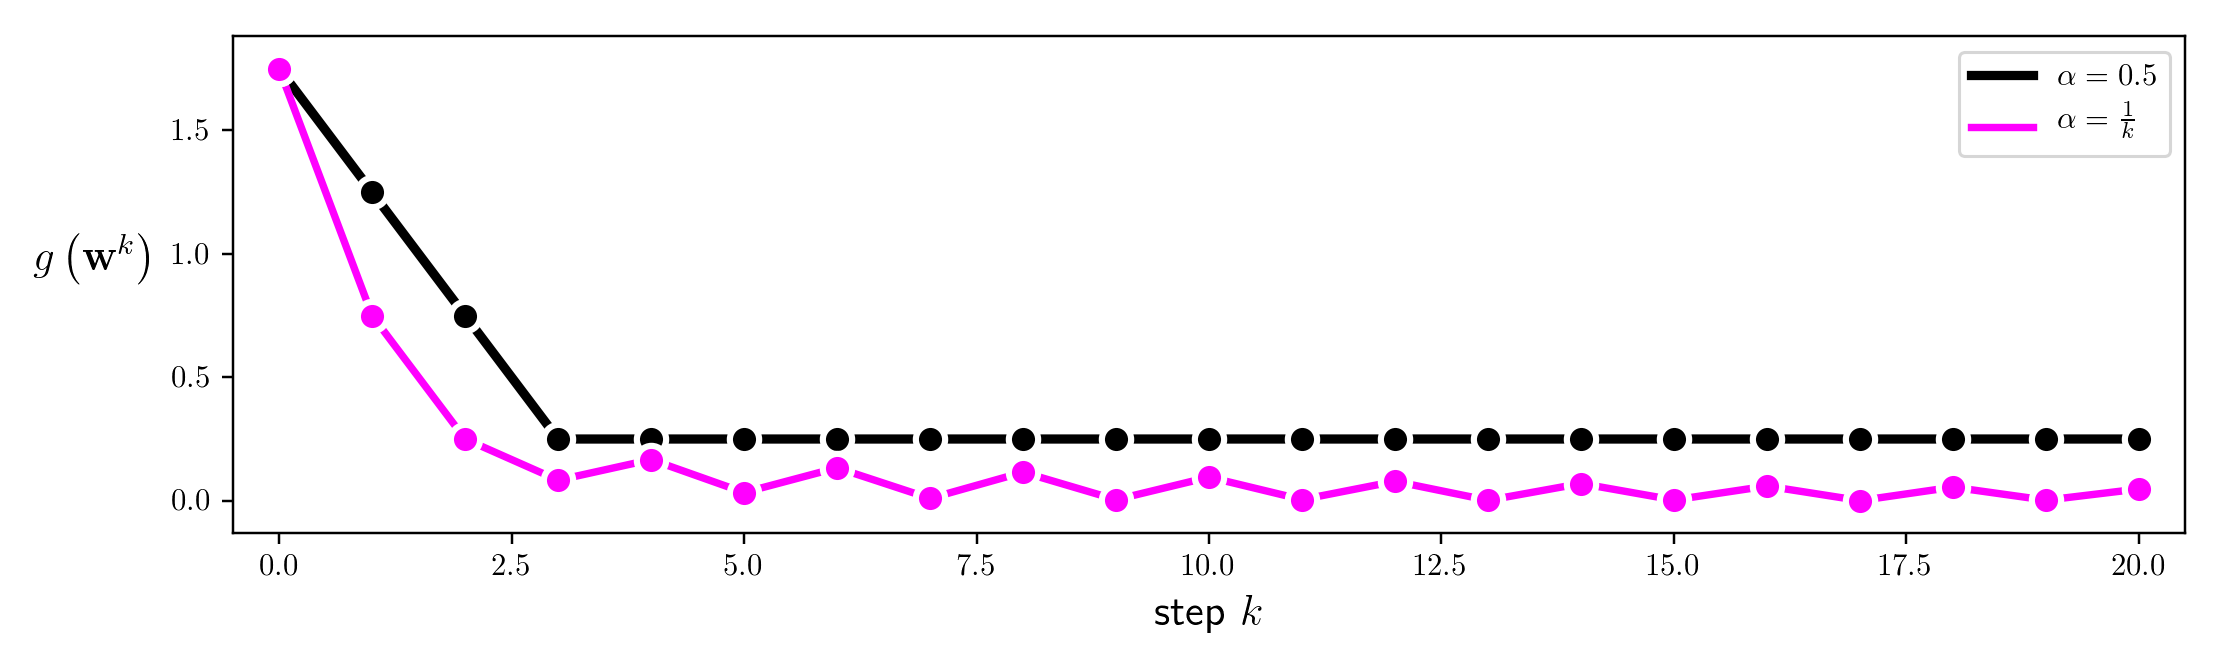

In [23]:
# This code cell will not be shown in the HTML version of this notebook
# plot the cost function history for a given run
static_plotter.plot_cost_histories([cost_history_1,cost_history_2],start = 0,points = True,labels = [r'$\alpha = 0.5$',r'\alpha = \frac{1}{k}$'])

# Exercise 3.7. Oscillation in the cost function history plot

In [9]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

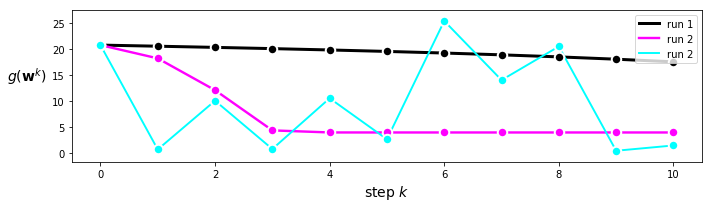

In [10]:
# This code cell will not be shown in the HTML version of this notebook
# what function should we play with?  Defined in the next line.
g = lambda w: w[0]**2 + w[1]**2 + 2*np.sin(1.5*(w[0] + w[1])) + 2

# first run
w = np.array([3.0,3.0]); max_its = 10; 
alpha_choice = 10**(-2);
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)

# second run
alpha_choice = 10**(-1);
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w)

# third run
alpha_choice = 10**(0);
weight_history_3,cost_history_3 = gradient_descent(g,alpha_choice,max_its,w)

# plot history
static_plotter.plot_cost_histories([cost_history_1,cost_history_2,cost_history_3],start = 0,points = True,labels = ['run 1','run 2'])

# Exercise 3.8. Tune fixed steplength for gradient descent

In [11]:
# import automatic differentiator to compute gradient module
from autograd import grad 
from autograd import numpy as np

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [12]:
# create the input function
g = lambda w: np.dot(w.T,w)[0][0]

In [13]:
# RUN GRADIENT DESCENT TO MINIMIZE THIS FUNCTION
N = 10
alpha_choice = 10**(0); max_its = 100; w = 10*np.ones((N,1));
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)

alpha_choice = 10**(-1);
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w)

alpha_choice = 10**(-2); 
weight_history_3,cost_history_3 = gradient_descent(g,alpha_choice,max_its,w)

In [14]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

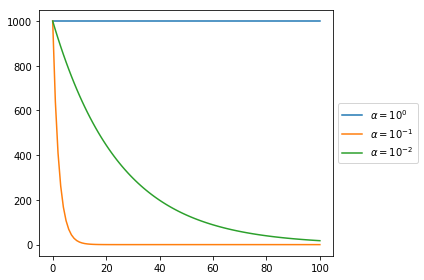

In [15]:
# plot 
plot_cost_histories([cost_history_1,cost_history_2,cost_history_3],labels = [r'$\alpha = 10^{0}$',r'$\alpha = 10^{-1}$',r'$\alpha = 10^{-2}$'])

# Exercise 3.9. Code up momentum-accelerated gradient descent

In [16]:
# This code cell will not be shown in the HTML version of this notebook
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import numpy as np
from autograd import value_and_grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def momentum(g,alpha_choice,beta,max_its,w):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    cost_eval,grad_eval = gradient(w)
    
    # initialization for momentum direction
    h = np.zeros((w.shape))
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
        
        #### momentum step - update exponential average of gradient directions to ameliorate zig-zagging ###
        h = beta*h - (1 - beta)*grad_eval

        # take gradient descent step
        w = w + alpha*h
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history

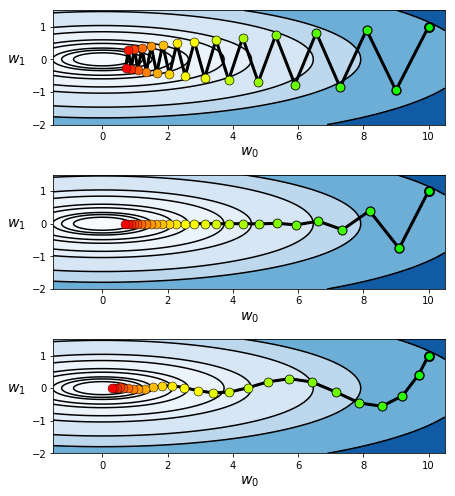

In [17]:
# define constants for a N=2 input quadratic
a1 = 0
b1 = 0*np.ones((2,1))
C1 = np.array([[0.5,0],[0,9.75]])

# a quadratic function defined using the constants above
g = lambda w: (a1 + np.dot(b1.T,w) + np.dot(np.dot(w.T,C1),w))[0]

w = np.array([10.0,1.0]); max_its = 25; alpha_choice = 10**(-1);
beta = 0
weight_history_1,cost_history_1 = momentum(g,alpha_choice,beta,max_its,w)

beta = 0.1;
weight_history_2,cost_history_2 = momentum(g,alpha_choice,beta,max_its,w)

beta = 0.7
weight_history_3,cost_history_3 = momentum(g,alpha_choice,beta,max_its,w)

# show run in both three-dimensions and just the input space via the contour plot
histories = [weight_history_1,weight_history_2,weight_history_3]
gs = [g,g,g]
static_plotter.two_input_contour_vert_plots(gs,histories,num_contours = 25,xmin = -1.5,xmax = 10.5,ymin = -2.0,ymax = 1.5)

# Exercise 3.10. Slow-crawling behavior of gradient descent

In [18]:
# This code cell will not be shown in the HTML version of this notebook
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import numpy as np
from autograd import value_and_grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha_choice,max_its,w,version):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
            
        if version == 'full':
            grad_norm = np.linalg.norm(grad_eval)
            if grad_norm == 0:
                grad_norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
            grad_eval /= grad_norm
        
        # normalize components
        if version == 'component':
            component_norm = np.abs(grad_eval) + 10**(-8)
            grad_eval /= component_norm
            
        if version == 'none':
            grad_eval = grad_eval

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history

In [19]:
# define function
g = lambda w: np.tanh(4*w[0] + 4*w[1]) + max(0.4*w[0]**2,1) + 1
w = np.array([1.0,2.0]); max_its = 100; alpha_choice = 10**(-1);

version = 'none'
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w,version)
version = 'full'
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w,version)

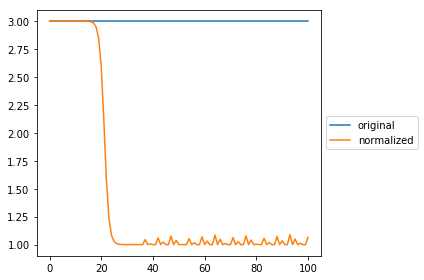

In [20]:
plot_cost_histories([cost_history_1,cost_history_2],labels = ['original','normalized'])

# Exercise 3.11. Comparing normalized gradient descent schemes

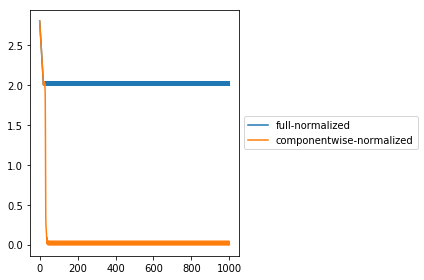

In [21]:
# define function
g = lambda w: np.max(np.tanh(4*w[0] + 4*w[1]),0) + np.max(np.abs(0.4*w[0]),0) + 1
w = np.array([2.0,2.0]); max_its = 1000; alpha_choice = 10**(-1);

version = 'full'
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w,version)

version = 'component'
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w,version)

plot_cost_histories([cost_history_1,cost_history_2],labels = ['full-normalized','componentwise-normalized'])

# Exercise 3.12. Alternative formal definition of Lipschitz gradient

One way to show this is via the *fundamental theorem of calculus*.  For a twice-differentiable function we have that

$$
\nabla g\left(\mathbf{x}\right) - \nabla g\left(\mathbf{y}\right) = \int_0^1 \nabla^2 g\left(\mathbf{y} + t\left(\mathbf{x}-\mathbf{y}\right)  \right)\left(\mathbf{x} - \mathbf{y} \right) dt
$$

Taking the length of both sides gives

$$
\left\Vert \nabla g\left(\mathbf{x}\right) - \nabla g\left(\mathbf{y}\right)\right\Vert_2 = \left\Vert \int_0^1 \nabla^2 g\left(\mathbf{y} + t\left(\mathbf{x}-\mathbf{y}\right)  \right)\left(\mathbf{x} - \mathbf{y} \right) dt \right\Vert_2
$$

Bringing the norm *inside* the integral, the right hand side above is *less* than

$$
\int_0^1  \left\Vert \nabla^2 g\left(\mathbf{y} + t\left(\mathbf{x}-\mathbf{y}\right)  \right)\left(\mathbf{x} - \mathbf{y} \right) \right\Vert_2 dt 
$$

which is less than taking the product of each norm (a standard matrix norm property)

$$
\int_0^1  \left\Vert \nabla^2 g\left(\mathbf{y} + t\left(\mathbf{x}-\mathbf{y}\right)  \right) \right\Vert_2 \left\Vert\left(\mathbf{x} - \mathbf{y} \right) \right\Vert_2 dt 
$$

Finally, because $\left\Vert \nabla^2 g\left(\mathbf{y} + t\left(\mathbf{x}-\mathbf{y}\right)  \right) \right\Vert_2 \leq L$ we have that

$$
\left\Vert \nabla g\left(\mathbf{x}\right) - \nabla g\left(\mathbf{y}\right)\right\Vert_2 \leq L \int_0^1  \left\Vert \left(\mathbf{x} - \mathbf{y} \right) \right\Vert_2 dt = L \left\Vert \left(\mathbf{x} - \mathbf{y} \right) \right\Vert_2
$$

# Exercise 3.13. A composition of functions with Lipschitz gradient

$f$ has Lipschitz continuous gradient with constant $J$, and $g$
is Lipschitz continuous with constant $K$, so we can write for all
$\mathbf{x}$ and $\mathbf{y}$ in the domain of $g$\noindent 
\begin{equation}
\left\Vert \nabla f\left(g\left(\mathbf{x}\right)\right)-\nabla f\left(g\left(\mathbf{y}\right)\right)\right\Vert _{2}\leq J\left\Vert g\left(\mathbf{x}\right)-g\left(\mathbf{y}\right)\right\Vert _{2}\leq JK\left\Vert \mathbf{x}-\mathbf{y}\right\Vert _{2}.
\end{equation}

Therefore, $f\left(g\right)$ has Lipschitz continuous gradient with
constant $JK$. 